# EDA for `score`




- Distribution of `score`
- Relation between score and other columns

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')
#f = "/content/drive/MyDrive/convincing_data.csv"

Mounted at /content/drive


In [ ]:
# Define the paths
f = "convincing_data.csv" 

In [2]:
# Packages imported
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [3]:
df = pd.read_csv(f)

### Distribution of `score`

In [4]:
#numeric description
df.score.describe()

count    709237.000000
mean          8.863195
std         123.962172
min        -518.000000
25%           1.000000
50%           2.000000
75%           5.000000
max       30304.000000
Name: score, dtype: float64

Text(0.5, 1.0, 'Histogram of Score')

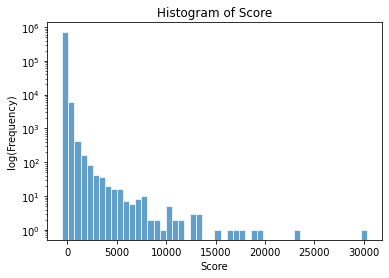

In [5]:
plt.hist(df['score'],bins=50,edgecolor='white',alpha = 0.7)
plt.yscale('log')
plt.xlabel('Score')
plt.ylabel('log(Frequency)')
plt.title('Histogram of Score')

<Axes: ylabel='score'>

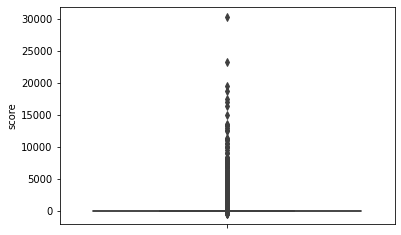

In [6]:
sns.boxplot(y = 'score', data = df)

The data is in wide range, so we need to scale for better observation on features.

Text(0, 0.5, '±log(|score|)')

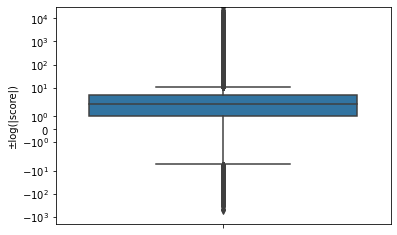

In [7]:
sns.boxplot(y = 'score', data = df)
plt.yscale('symlog') 
plt.ylabel('±log(|score|)')

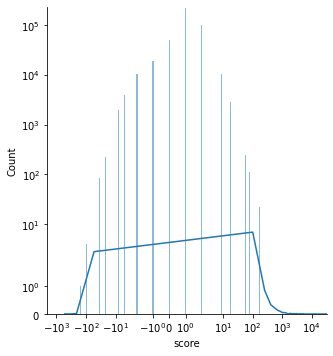

In [61]:
sns.displot(data = df,x='score',kde=True)
plt.xscale('symlog')
plt.yscale('symlog')

the score data is highly dispersed

### Relation between `score` and other variables. 

#### `score` vs `sentiment`

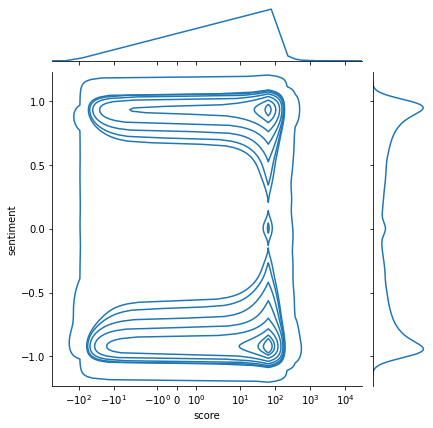

In [11]:
sns.jointplot(data = df,x = 'score',y = 'sentiment',kind = 'kde')
plt.xscale('symlog')

In [12]:
corr = df.corr()['sentiment']['score']
print('Correlation coefficient:', corr)
corr, p_value = pearsonr(df.sentiment, df.score)
print('Pearson correlation coefficient:', corr)
print('P value:', p_value)

Correlation coefficient: -0.0007747254427906044
Pearson correlation coefficient: -0.000774725442790529
P value: 0.5141152051052601


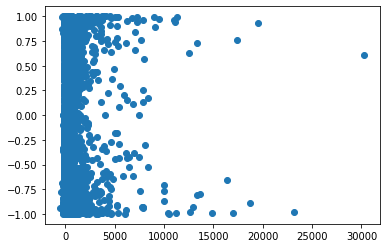

In [13]:
plt.scatter(df['score'],df['sentiment'])

They are obviously not related.

In [62]:
num_bins = 20
bounds = list(np.arange(-1.0,1.1,0.1))
bounds = [round(num, 2) for num in bounds]

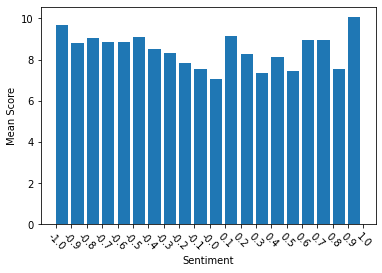

In [63]:
score_level = pd.cut(df['sentiment'], bins=num_bins).cat.codes
tmp = df.groupby(score_level).mean()
fig, ax = plt.subplots()
ax.bar(tmp.index,tmp.score,align='edge')
ax.set_xticks(list(range(0,num_bins+1)), bounds,rotation = -45)

ax.set_xlabel('Sentiment')
ax.set_ylabel('Mean Score')

plt.show()

#### `score` vs `created_utc`

In [64]:
from datetime import datetime
import pytz

def utc2date(utcint):
  utc_timestamp = utcint

  utc_time = datetime.utcfromtimestamp(utc_timestamp)

  utc_timezone = pytz.utc
  local_timezone = pytz.timezone('Asia/Shanghai')

  local_time = utc_timezone.localize(utc_time).astimezone(local_timezone)
  return local_time


In [65]:
df['time'] = df.created_utc.apply(lambda x: utc2date(x))

Text(0, 0.5, 'Score')

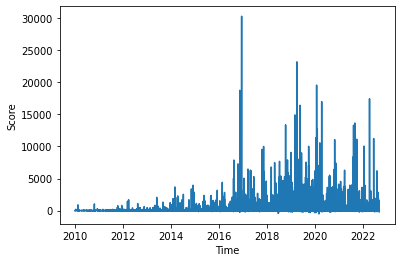

In [66]:
plt.plot(df.time,df.score)
plt.xlabel('Time')
plt.ylabel('Score')

In [67]:
date = df.set_index('time')
grouped = date.groupby(pd.Grouper(freq='Y'))
grouped['score'].mean()

time
2010-12-31 00:00:00+08:00    3.350294
2011-12-31 00:00:00+08:00    3.537710
2012-12-31 00:00:00+08:00    4.417224
2013-12-31 00:00:00+08:00    4.696784
2014-12-31 00:00:00+08:00    5.423867
2015-12-31 00:00:00+08:00    6.050413
2016-12-31 00:00:00+08:00    9.772028
2017-12-31 00:00:00+08:00    9.537652
2018-12-31 00:00:00+08:00    9.352166
2019-12-31 00:00:00+08:00    8.876524
2020-12-31 00:00:00+08:00    9.935184
2021-12-31 00:00:00+08:00    9.376896
2022-12-31 00:00:00+08:00    8.980259
Freq: A-DEC, Name: score, dtype: float64

Text(0.5, 1.0, 'Mean Score by Year')

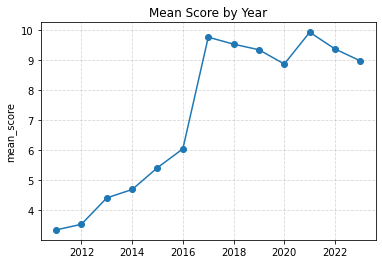

In [68]:
plt.plot(grouped['score'].mean(),marker='o', markersize=6)
plt.grid(True, linestyle='--', alpha=0.5)
plt.ylabel('mean_score')
plt.title('Mean Score by Year')